In [13]:
import torch
import numpy as np
from utils import mutual_information, entanglement_of_formation
from data import *
import matplotlib.pyplot as plt


def entanglement_measure(target_prob):
    state = torch.sqrt(target_prob)
    ent_list = []

    n_qubit = int(np.log2(len(state)))
    MI_image = np.zeros((n_qubit, n_qubit))
    EOF_image = np.zeros((n_qubit, n_qubit))

    for i in range(n_qubit):
        for j in range(i + 1, n_qubit):
            MI = mutual_information(state, subsystems=(i, j))
            EOF = entanglement_of_formation(state, subsystems=(i, j))
            MI_image[i, j] = MI_image[j, i] = MI
            EOF_image[i, j] = EOF_image[j, i] = EOF
            ent_list.append([(i, j), MI, EOF])

    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    subfig1 = ax1.imshow(MI_image)
    ax1.set_title("quantum mutual information for real image 1")
    ax1.set_xticks(np.arange(16))
    ax1.set_yticks(np.arange(16))
    subfig2 = ax2.imshow(EOF_image)
    ax2.set_title("entanglement of formation for real image 1")
    ax2.set_xticks(np.arange(16))
    ax2.set_yticks(np.arange(16))
    cbar1 = plt.colorbar(subfig1, ax=ax1, orientation="horizontal", shrink=0.95)
    cbar2 = plt.colorbar(subfig2, ax=ax2, orientation="horizontal", shrink=0.95)
    subfig2.set_clim(vmin=0.000)
    cbar1.ax.tick_params(labelsize=8)
    cbar2.ax.tick_params(labelsize=8)

    ent_list = sorted(ent_list, key=lambda x: x[1], reverse=True)

    # for ent_description in ent_list:
    #     (i, j) = ent_description[0]
    #     MI = ent_description[1]
    #     EOF = ent_description[2]
    #     print(
    #         f"subsystem: ({i}, {j}) | mutual information: {MI: 3f} | entanglement of formation: {EOF:3f}"
    #     )

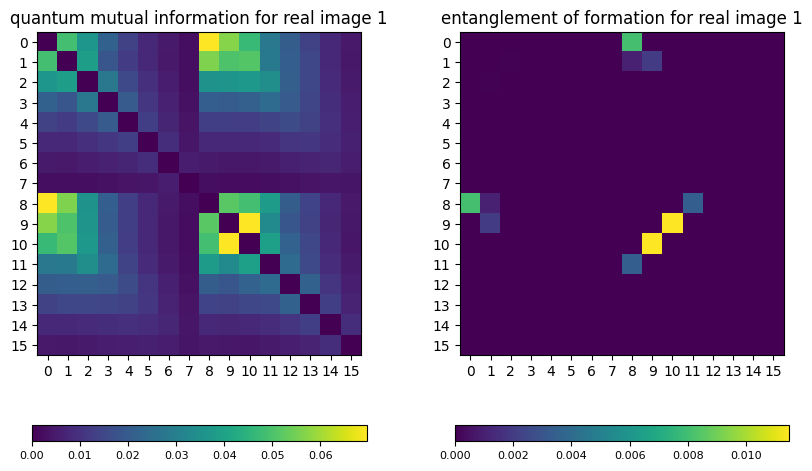

In [14]:
entanglement_measure(
    torch.Tensor(DATA_HUB["real image 1"].get_data(num=10000000)).double()
)

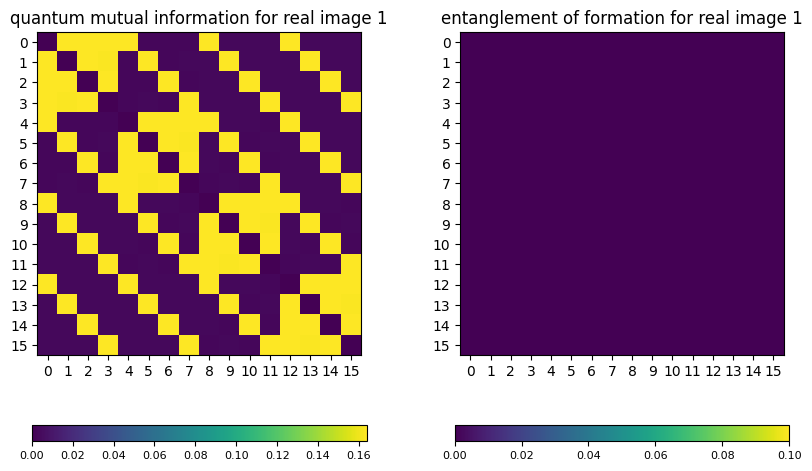

In [12]:
entanglement_measure(torch.Tensor(DATA_HUB["bas 4x4"].get_data(num=10000000)).double())